In [3]:
import cv2 
import matplotlib.pyplot as plt 

import numpy as np

In [4]:
img = cv2.imread("CR7.jpg")
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

In [5]:
cv2.resize(img , (500 ,500))

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 9,  8, 16],
        [ 8,  7, 14],
        [ 8,  7, 12]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 9,  8, 15],
        [ 8,  7, 13],
        [ 8,  7, 12]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 9,  8, 16],
        [ 8,  7, 14],
        [ 9,  8, 13]],

       ...,

       [[32, 32, 34],
        [32, 32, 34],
        [31, 31, 33],
        ...,
        [ 4,  3,  7],
        [ 5,  4,  9],
        [ 6,  5, 10]],

       [[31, 31, 33],
        [31, 31, 33],
        [31, 31, 33],
        ...,
        [ 4,  4,  7],
        [ 5,  4,  9],
        [ 6,  5, 10]],

       [[30, 30, 32],
        [31, 31, 33],
        [31, 31, 33],
        ...,
        [ 4,  4,  8],
        [ 5,  4,  9],
        [ 6,  5, 10]]], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

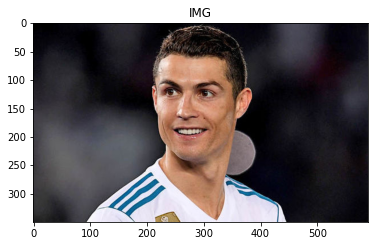

In [6]:
plt.imshow(img)
plt.title('IMG')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

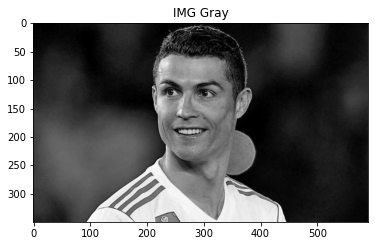

In [7]:
grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(grey_img , cmap='gray')
plt.title('IMG Gray')
plt.show

In [8]:
invert_img=cv2.bitwise_not(grey_img)


In [9]:
invert_img

array([[255, 255, 255, ..., 245, 246, 246],
       [255, 255, 255, ..., 245, 246, 245],
       [255, 255, 255, ..., 244, 245, 245],
       ...,
       [220, 221, 222, ..., 250, 249, 248],
       [222, 222, 223, ..., 250, 249, 248],
       [224, 223, 223, ..., 249, 249, 248]], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

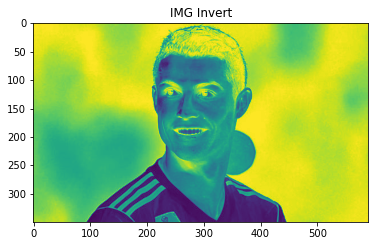

In [10]:
plt.imshow(invert_img)
plt.title('IMG Invert')
plt.show

In [11]:
blur_img=cv2.GaussianBlur(invert_img, (111,111),0)
invert_img

array([[255, 255, 255, ..., 245, 246, 246],
       [255, 255, 255, ..., 245, 246, 245],
       [255, 255, 255, ..., 244, 245, 245],
       ...,
       [220, 221, 222, ..., 250, 249, 248],
       [222, 222, 223, ..., 250, 249, 248],
       [224, 223, 223, ..., 249, 249, 248]], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

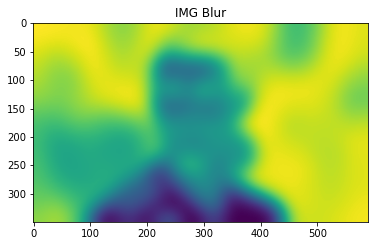

In [12]:
plt.imshow(blur_img)
plt.title('IMG Blur')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

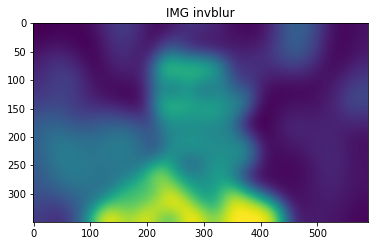

In [13]:
invblur_img=cv2.bitwise_not(blur_img)
plt.imshow(invblur_img)
plt.title('IMG invblur')
plt.show

In [14]:
sketch_img=cv2.divide(grey_img,invblur_img, scale=256.0)


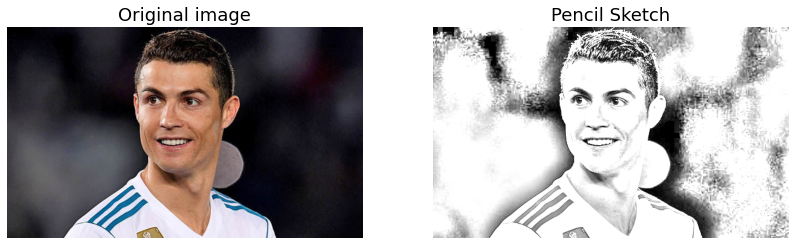

In [15]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.title('Original image', size=18)
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Pencil Sketch', size=18)
rgb_sketch=cv2.cvtColor(sketch_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_sketch)
plt.axis('off')
plt.show()

In [16]:
def img2sketch(photo, k_size):
    img=cv2.imread(photo)
    
    grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    invert_img=cv2.bitwise_not(grey_img)

    blur_img=cv2.GaussianBlur(invert_img, (k_size,k_size),0)

    invblur_img=cv2.bitwise_not(blur_img)

    sketch_img=cv2.divide(grey_img,invblur_img, scale=256.0)

 

    cv2.imshow('sketch image',sketch_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# GUI using PYQT5 

In [1]:
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow,
    QPushButton,
    QLabel,
    QFileDialog,
    QVBoxLayout,
    QHBoxLayout,
    QStatusBar,
    QAction,
    QMenu,
)
from PyQt5.QtWidgets import QWidget

from PyQt5.QtGui import QPixmap, QImage, QIcon
import cv2
import os
from PyQt5.QtCore import Qt

from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QPushButton

from PyQt5.QtGui import QFont, QColor


def img2sketch(photo, k_size):
   
    img = cv2.imread(photo)

     
    grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  
    invert_img = cv2.bitwise_not(grey_img)

     
    blur_img = cv2.GaussianBlur(invert_img, (k_size, k_size), 0)

 
    invblur_img = cv2.bitwise_not(blur_img)

    
    sketch_img = cv2.divide(grey_img, invblur_img, scale=256.0)

    return sketch_img


class MainWindow(QMainWindow):

    def save_image(self):
        if self.filename:
           
            pixmap = self.lbl_image.pixmap()
            if pixmap:
               
                save_dialog = QFileDialog(self)
                save_dialog.setAcceptMode(QFileDialog.AcceptSave)
                save_dialog.setNameFilter("JPEG (*.jpg *.jpeg);;PNG (*.png)")
                save_dialog.setDefaultSuffix(".jpg")
                save_dialog.setDirectory(os.path.dirname(self.filename))
                if save_dialog.exec_():
                    filename = save_dialog.selectedFiles()[0]
                     
                    pixmap.save(filename)
                    self.statusBar.showMessage(f"Image saved to {filename}")
        else:
            self.statusBar.showMessage("Please select an image first")

    def __init__(self):
        super().__init__()



        self.setStyleSheet("background-color: #99ccff;")

        
        self.setWindowTitle("Pencil Sketcher")
        self.setStyleSheet("background-color: #f7f7f7;")

         
        central_widget = QWidget()
        self.setCentralWidget(central_widget)
        vbox = QVBoxLayout()
        central_widget.setLayout(vbox)

        lbl_codeclause = QLabel("CodeClause", self)
        lbl_codeclause.setAlignment(Qt.AlignCenter)
        
        lbl_codeclause.setStyleSheet("color: #00ccff;")


        lbl_font = QFont("Arial", 50)
        lbl_codeclause.setFont(lbl_font)



         
        vbox.addWidget(lbl_codeclause, 0, Qt.AlignTop)

        
        self.btn_select_image = QPushButton(self)
        self.btn_select_image.setIcon(QIcon("Photos/open.png"))
        self.btn_select_image.setIconSize(self.btn_select_image.size())
        self.btn_select_image.setStyleSheet("background-color: #4d79ff;")
        self.btn_select_image.setText("Select Image")
        self.btn_select_image.setToolTip("Open an image file")
        vbox.addWidget(self.btn_select_image)
        self.btn_select_image.clicked.connect(self.select_image)

        
        self.btn_sketch = QPushButton(self)
        self.btn_sketch.setIcon(QIcon("Photos/pencil.png"))
        self.btn_sketch.setIconSize(self.btn_sketch.size())
        self.btn_sketch.setStyleSheet("background-color: #4d79ff;")
        self.btn_sketch.setText("Pencil Sketch")
        self.btn_sketch.setToolTip("Convert the image to pencil sketch")
        vbox.addWidget(self.btn_sketch)
        self.btn_sketch.clicked.connect(self.convert_to_sketch)

       
        self.lbl_image = QLabel(self)
        self.lbl_image.setMinimumSize(450, 450)
        vbox.addWidget(self.lbl_image)

        
        self.statusBar = QStatusBar()
        self.setStatusBar(self.statusBar)

        
        self.filename = ""

      
        menubar = self.menuBar()
        file_menu = menubar.addMenu("File")

         
        open_action = QAction("Open", self)
        open_action.setShortcut("Ctrl+O")
        open_action.triggered.connect(self.select_image)
        file_menu.addAction(open_action)

        save_action = QAction("Save", self)
        save_action.setShortcut("Ctrl+S")
        save_action.triggered.connect(self.save_image)
        file_menu.addAction(save_action)

    def select_image(self):
       
        file_dialog = QFileDialog(self)
        file_dialog.setNameFilter("Image Files (*.jpg *.jpeg *.png *.gif)")
        file_dialog.setViewMode(QFileDialog.Detail)
        if file_dialog.exec_():
            self.filename = file_dialog.selectedFiles()[0]

          
            pixmap = QPixmap(self.filename)
            self.lbl_image.setPixmap(pixmap)
            self.lbl_image.setScaledContents(True)
            self.image = cv2.imread(self.filename)

    def convert_to_sketch(self):
        
        sketch_image = img2sketch(self.filename, 21)  
        qimage = QImage(sketch_image.data, sketch_image.shape[1], sketch_image.shape[0], QImage.Format_Grayscale8)
        pixmap = QPixmap.fromImage(qimage)
        self.lbl_image.setPixmap(pixmap)
        self.lbl_image.setScaledContents(True)




if __name__ == "__main__":
    app = QApplication(sys.argv)
    window = MainWindow()
    window.setGeometry(100, 100, 700, 600)
    window.show()
    sys.exit(app.exec_())



SystemExit: 0

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
